In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

# Load the dataset
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv', sep=',')


### Investigation
Checking the shape, listing features, checking for nulls.

In [23]:
print(df.isnull().sum())
print(df.shape)

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
(253680, 22)


In [24]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

print(X.shape)
print(y.shape)

(253680, 21)
(253680,)


# Neural Network Approach

In [25]:
def train_and_test_model(test_size, hidden_layer_sizes):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=300, random_state=42)
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    return accuracy_score(y_test, y_predict)

In [26]:
# commented out because it'll take a while to run
"""
test_sizes = [i/100 for i in range(99, 69, -1)]
accuracies = []

for test_size in test_sizes:
    accuracy = train_and_test_model(test_size, (21, 21))
    accuracies.append(accuracy)

plt.plot(test_sizes, accuracies)
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Test Size')
plt.show()
"""

"\ntest_sizes = [i/100 for i in range(99, 69, -1)]\naccuracies = []\n\nfor test_size in test_sizes:\n    accuracy = train_and_test_model(test_size, (21, 21))\n    accuracies.append(accuracy)\n\nplt.plot(test_sizes, accuracies)\nplt.xlabel('Test Size')\nplt.ylabel('Accuracy')\nplt.title('Accuracy vs Test Size')\nplt.show()\n"

### Output for Accuracy VS Test Size
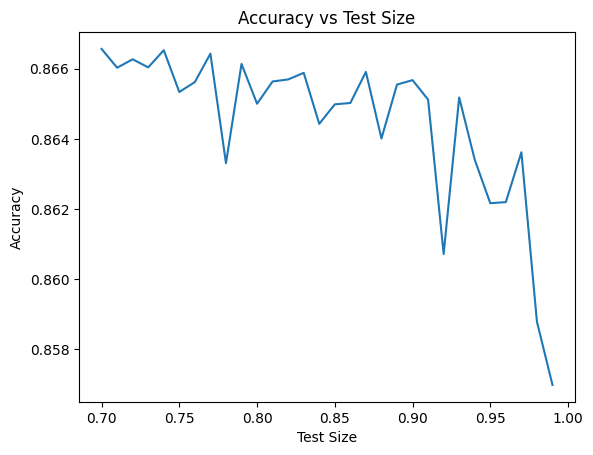  

In [27]:
# commented out because it'll take a while to run.
"""
hidden_layer_sizes = range(2, 26, 1)
accuracies_single = []
accuracies_double = []

for size in hidden_layer_sizes:
    accuracy_single = train_and_test_model(0.1, [size])
    accuracies_single.append(accuracy_single)
    accuracy_double = train_and_test_model(0.1, [size, size])
    accuracies_double.append(accuracy_double)

plt.plot(hidden_layer_sizes, accuracies_single, label='one layer', color='blue')
plt.plot(hidden_layer_sizes, accuracies_double, label='two layers', color='green')

plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Hidden Layer Sizes')
plt.legend()
plt.show()
"""

"\nhidden_layer_sizes = range(2, 26, 1)\naccuracies_single = []\naccuracies_double = []\n\nfor size in hidden_layer_sizes:\n    accuracy_single = train_and_test_model(0.1, [size])\n    accuracies_single.append(accuracy_single)\n    accuracy_double = train_and_test_model(0.1, [size, size])\n    accuracies_double.append(accuracy_double)\n\nplt.plot(hidden_layer_sizes, accuracies_single, label='one layer', color='blue')\nplt.plot(hidden_layer_sizes, accuracies_double, label='two layers', color='green')\n\nplt.xlabel('Hidden Layer Sizes')\nplt.ylabel('Accuracy')\nplt.title('Accuracy vs Hidden Layer Sizes')\nplt.legend()\nplt.show()\n"

### Output for Accuracy vs Hidden Layer Sizes
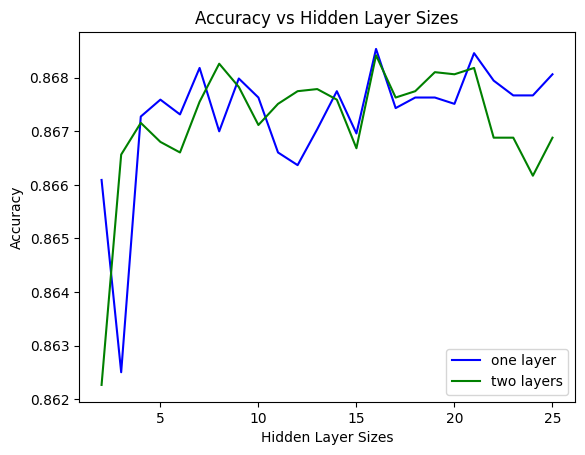

Average accuracy 0.8638386604836452


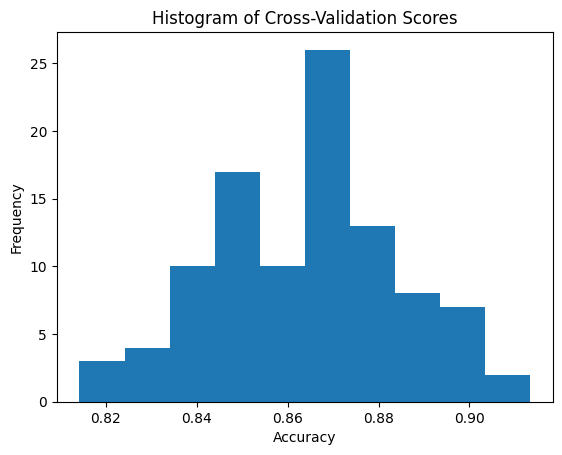

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=[7], max_iter=300)

kfold = KFold(n_splits=100, shuffle=True, random_state=42)
accuracy = cross_val_score(model, X_train, y_train, cv=kfold)
print('Average accuracy', accuracy.mean())
plt.hist(accuracy, bins=10)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Cross-Validation Scores')
plt.show()

# SVM Approach

Average Accuracy:  0.864390775263764


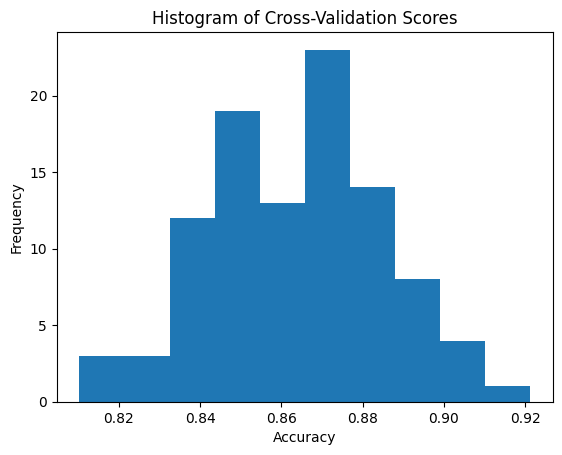

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC()
svm.fit(X_train, y_train)

kfold = KFold(n_splits=100, shuffle=True, random_state=42)
accuracy = cross_val_score(svm, X_train, y_train, cv=kfold)
print('Average accuracy: ', np.mean(scores))

plt.hist(scores, bins=10)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Cross-Validation Scores')
plt.show()
